In [485]:
from os import path

from defi_econ.constants import UNISWAP_V3_DATA_PATH
from defi_econ.constants import UNISWAP_V2_DATA_PATH

from collections import Counter

In [486]:
import datetime
import calendar
import pandas as pd
import numpy as np


# Data Manipulation

## Load the data

In [487]:
# Read File
# raw data
data_file_v3 = path.join(UNISWAP_V3_DATA_PATH, "swap/uniswap_v3_swaps_2022TEST.csv")
data_file_v2 = path.join(UNISWAP_V2_DATA_PATH, "swap/uniswap_v2_swaps_2022TEST.csv")

# top 50 pool list for the filter
pool_file_v3 = path.join(UNISWAP_V3_DATA_PATH, "top50_pairs_list_v3_2022JUL.csv")
pool_file_v2 = path.join(UNISWAP_V2_DATA_PATH, "top50_pairs_list_v2_2022JUL.csv")

In [488]:
# Load Data
data_v3 = pd.read_csv(data_file_v3, index_col=0)
data_v2 = pd.read_csv(data_file_v2, index_col=0)

# Define to filter from the top pools
top_pools_v3 = pd.read_csv(pool_file_v3, index_col=0)
top_pools_v2 = pd.read_csv(pool_file_v2, index_col=0)

## Format the data

In [489]:
# Format the attributes of data to be consistent between V2 and V3

# Add attribute as "Source" and "Target" for the trading direction
data_v3['Source'] = data_v3.apply(lambda x: x.token0_symbol if float(x.amount0) > 0 else x.token1_symbol, axis=1)
data_v3['Pool_Out_Volume'] = data_v3.apply(lambda x: x.amount0 if x.Source==x.token0_symbol else x.amount1, axis=1)
data_v3['Target'] = data_v3.apply(lambda x: x.token1_symbol if float(x.amount0) > 0 else x.token0_symbol, axis=1)
data_v3['Pool_In_Volume'] = data_v3.apply(lambda x: x.amount0 if x.Target==x.token0_symbol else x.amount1, axis=1)
data_v3 = data_v3.drop(['sender', 'recipient', 'origin'], axis=1)
data_v3['Version'] = "V3"


data_v2['amount0'] = data_v2.apply(lambda x: x.amount0In - x.amount0Out, axis=1)
data_v2['amount1'] = data_v2.apply(lambda x: x.amount1In - x.amount1Out, axis=1)
data_v2['Source'] = data_v2.apply(lambda x: x.token0_symbol if float(x.amount0) > 0 else x.token1_symbol, axis=1)
data_v2['Pool_Out_Volume'] = data_v2.apply(lambda x: x.amount0 if x.Source==x.token0_symbol else x.amount1, axis=1)
data_v2['Target'] = data_v2.apply(lambda x: x.token1_symbol if float(x.amount0) > 0 else x.token0_symbol, axis=1)
data_v2['Pool_In_Volume'] = data_v2.apply(lambda x: x.amount0 if x.Target==x.token0_symbol else x.amount1, axis=1)
data_v2 = data_v2.drop(['amount0In', 'amount0Out', 'amount1In', 'amount1Out', 'sender', 'to'], axis=1)
data_v2['Version'] = "V2"

data_v2

,id,transaction,timestamp,amountUSD,pool,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,1656633600,9823.486251,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-2.897818e+10,9.189142e+00,WETH,9.189142e+00,ELON,-2.897818e+10,V2
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,1656633600,5847.604834,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.719595e+10,5.470000e+00,WETH,5.470000e+00,ELON,-1.719595e+10,V2
2,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1630.175325,0x171d6a77251f64865aa6250119ec661dabd0c947,0x310c8f00b9de3c31ab95ea68feb6c877538f7947,UNDEAD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,1.505000e+03,-1.628570e+03,UNDEAD,1.505000e+03,USDC,-1.628570e+03,V2
3,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1624.897842,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.628570e+03,-1.625105e+03,USDC,1.628570e+03,USDT,-1.625105e+03,V2
4,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,1656633600,1814.562938,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.810344e+03,1.700000e+00,WETH,1.700000e+00,USDC,-1.810344e+03,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49280,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,0x8dd40bd2d2a2afd32121009906d4a3ef5d1330ac27e4...,1656719998,250.581245,0x841bb1966c1d1b80634111691471c667e4c2bfe4,0x3819f64f282bf135d62168c1e513280daf905e06,HDRN,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,3.467844e+08,-2.511075e+02,HDRN,3.467844e+08,USDC,-2.511075e+02,V2
49281,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,132.232950,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,2.589067e+05,-1.250407e-01,PIECE,2.589067e+05,WETH,-1.250407e-01,V2
49282,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,0xb3c391a96f6298c7e81261ed97444426402140d591e4...,1656719998,1654.578688,0x9f94870c393c1d93c2f23686fb107d73ad8c62c5,0x6f92357f3c70bba47c6e255fd0b39345f1a0e39c,PIECE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,3.398785e+06,-1.587178e+00,PIECE,3.398785e+06,WETH,-1.587178e+00,V2
49283,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,0xbd5fffd2a6cf8ffd4293e979cd8c6996ff6ca0880a34...,1656719998,423.235527,0x64cac8fa24f437ceca90e20a7a24a609f162b0d1,0x362bc847a3a9637d3af6624eec853618a43ed7d2,PRQ,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-3.850403e+03,4.000000e-01,WETH,4.000000e-01,PRQ,-3.850403e+03,V2


In [490]:
data_v3

,id,transaction,timestamp,pool,amount0,amount1,amountUSD,token0_id,token0_symbol,token1_id,token1_symbol,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x3328ca5b535d537f88715b305375c591cf52d541,-1831.160783,4508.575446,4508.575446,0x34f0915a5f15a66eba86f6a58be1a471fb7836a7,PLSD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USDC,4508.575446,PLSD,-1831.160783,V3
1,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0xcbfb0745b8489973bf7b334d54fdbd573df7ef3c,-0.227546,4500.000000,4504.521733,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,USDC,4500.000000,WBTC,-0.227546,V3
2,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,-4508.575446,4.221792,4510.106586,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,4.221792,USDC,-4508.575446,V3
3,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,0x0bf8725a901d0e80e1e71380ae5d256c4041792d98db...,1656633600,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,0.227546,-4.221792,4510.340596,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WBTC,0.227546,WETH,-4.221792,V3
4,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,0x27ec123509fe6d4ceeb55cd8be5abe73cf0e7fd9f207...,1656633600,0xf4ad61db72f114be877e87d62dc5e7bd52df4d9b,10079.956458,-4.293675,4588.456283,0x5a98fcbea516cf06857215779fd812ca3bef1b32,LDO,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,LDO,10079.956458,WETH,-4.293675,V3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,0x11b815efb8f581194ae79006d24e0d814b7697f6,0.135720,-143.658043,143.548618,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,WETH,0.135720,USDT,-143.658043,V3
37248,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,0x75099758a9d1f43198043825c8fbcf8a12be7a74,-3.340323,143.658043,143.658043,0x29127fe04ffa4c32acac0ffe17280abd74eac313,sifu,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,USDT,143.658043,sifu,-3.340323,V3
37249,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,1656719998,0xea4ba4ce14fdd287f380b55419b1c5b6c3f22ab6,-128.119973,5.748299,6063.007988,0xc00e94cb662c3520282e6f5717214004a7f26888,COMP,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,5.748299,COMP,-128.119973,V3
37250,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,1656719998,0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf,-1198.044548,5.131783,5423.674193,0x4d224452801aced8b2f0aebe155379bb5d594381,APE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,WETH,5.131783,APE,-1198.044548,V3


## Merge the data

In [491]:
# The merged dataset by combining V2 AND V3
data_merge = pd.concat([data_v2, data_v3], axis=0)
# data_merge = data_v3 # control on specific version

In [492]:
data_merge

,id,transaction,timestamp,amountUSD,pool,token0_id,token0_symbol,token1_id,token1_symbol,amount0,amount1,Source,Pool_Out_Volume,Target,Pool_In_Volume,Version
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,1656633600,9823.486251,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-2.897818e+10,9.189142,WETH,9.189142,ELON,-2.897818e+10,V2
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,1656633600,5847.604834,0x7b73644935b8e68019ac6356c40661e1bc315860,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,ELON,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.719595e+10,5.470000,WETH,5.470000,ELON,-1.719595e+10,V2
2,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1630.175325,0x171d6a77251f64865aa6250119ec661dabd0c947,0x310c8f00b9de3c31ab95ea68feb6c877538f7947,UNDEAD,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,1.505000e+03,-1628.570206,UNDEAD,1505.000000,USDC,-1.628570e+03,V2
3,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,0x5d74aafb4d18bbb9d0575907fe0755373753afac8acc...,1656633600,1624.897842,0x3041cbd36888becc7bbcbc0045e3b1f144466f5f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.628570e+03,-1625.105404,USDC,1628.570206,USDT,-1.625105e+03,V2
4,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,0x60a1f7611b53e05f106fee4f43c859f9c12eed3e01c9...,1656633600,1814.562938,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.810344e+03,1.700000,WETH,1.700000,USDC,-1.810344e+03,V2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37247,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,143.548618,0x11b815efb8f581194ae79006d24e0d814b7697f6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,1.357196e-01,-143.658043,WETH,0.135720,USDT,-1.436580e+02,V3
37248,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,0xacf7d614306e316a2c84ce165e4063cee23b5e1d1279...,1656719998,143.658043,0x75099758a9d1f43198043825c8fbcf8a12be7a74,0x29127fe04ffa4c32acac0ffe17280abd74eac313,sifu,0xdac17f958d2ee523a2206206994597c13d831ec7,USDT,-3.340323e+00,143.658043,USDT,143.658043,sifu,-3.340323e+00,V3
37249,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,0xb78051f4bdfad69ff8d956207662f00b35ed058a22dd...,1656719998,6063.007988,0xea4ba4ce14fdd287f380b55419b1c5b6c3f22ab6,0xc00e94cb662c3520282e6f5717214004a7f26888,COMP,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.281200e+02,5.748299,WETH,5.748299,COMP,-1.281200e+02,V3
37250,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,1656719998,5423.674193,0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf,0x4d224452801aced8b2f0aebe155379bb5d594381,APE,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-1.198045e+03,5.131783,WETH,5.131783,APE,-1.198045e+03,V3


In [493]:
# group by parent transactions
swaps_v3 = data_v3.set_index(['transaction', 'pool'])
swaps_v2 = data_v2.set_index(['transaction', 'pool'])
swaps_merge = data_merge.set_index(['transaction', 'pool'])


## Filter the data

In [494]:
# drop transactions which sub-transactions out of top pools
drop_tx_list_v2 = data_v2[~data_v2.pool.isin(top_pools_v2['pairAddress'].values)]
drop_tx_id_list_v2 = drop_tx_list_v2['transaction']
drop_tx_id_list_v2 = drop_tx_id_list_v2.unique()
# drop_tx_id_list_v2  # return parent transaction id for those involoving sub-transacitons out of top pools

In [495]:
# drop transactions which sub-transactions out of top pools
drop_tx_list_v3 = data_v3[~data_v3.pool.isin(top_pools_v3['id'].values)]
drop_tx_id_list_v3 = drop_tx_list_v3['transaction']
drop_tx_id_list_v3 = drop_tx_id_list_v3.unique()
# drop_tx_id_list_v3  # return parent transaction id for those involoving sub-transacitons out of top pools

In [496]:
drop_tx_id_list_merge = np.concatenate((drop_tx_id_list_v2, drop_tx_id_list_v3), axis=0) # merge
drop_tx_id_list_merge = np.unique(drop_tx_id_list_merge) # drop duplicates

In [497]:
swaps_merge.drop(drop_tx_id_list_merge, level=0, axis=0, inplace=True)
# swaps_merge.drop(drop_tx_id_list_v3, level=0, axis=0, inplace=True) # Control on a specific version
swaps_merge

id  \
transaction                                        pool                                                                                            
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860  0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860  0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  0x60f9fea1939df19789bf1128830eefbb2388b1953744...   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860  0x60f9fea1939df19789bf1128830eefbb2388b1953744...   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  0xa39a21288a8b72232e1f46769c2ce846f95077b215c9...   
...                                                                                                                                          ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0xd55f1156987df8c8b197d3c539f58170903015255511...   

                                                                                                timestamp  \
transaction                                        pool                                                     
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  1656633600   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  1656633600   
...                                                                                                   ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  1656719998   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  1656719998   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  1656719998   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  1656719998   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656719998   

                                                                                                   amountUSD  \
transaction                                        pool                                                        
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860    9823.486251   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860    5847.604834   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852    4978.799611   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860    4972.239775   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852    2985.723842   
...            

In [498]:
# v2_count = 0
# v3_count = 0
# v2v3_count = 0

# for p_tx_index in swaps_merge.index.get_level_values(0).unique():
#     parent_tx = swaps_merge.loc[p_tx_index, :]
    
#     v2_sub = 0
#     v3_sub = 0
#     for index, row in parent_tx.iterrows():
#         if row['Version'] == 'V2':
#             v2_sub += 1
#         elif row['Version'] == 'V3':
#             v3_sub += 1
    
#     if v2_sub == len(parent_tx) and v3_sub == 0:
#         v2_count += 1
#     elif v3_sub == len(parent_tx) and v2_sub == 0:
#         v3_count += 1
#     elif v3_sub + v2_sub == len(parent_tx) and v3_sub != 0 and v2_sub != 0:
#         v2v3_count += 1
#     else:
#         print('Error: ', parent_tx)

In [499]:
# total = v2_count+v3_count+v2v3_count
# print('only v2: ', v2_count/total)
# print('only v3: ', v3_count/total)
# print('across v2+v3: ', v2v3_count/total)

# Chain Length

In [500]:
# Add the attribute as "Distance" to present the number of sub-transactions
swaps_merge['Distance'] = swaps_merge.apply(lambda x: len(swaps_merge.loc[x.name[0]]), axis=1)
swaps_merge

id  \
transaction                                        pool                                                                                            
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860  0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860  0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  0x60f9fea1939df19789bf1128830eefbb2388b1953744...   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860  0x60f9fea1939df19789bf1128830eefbb2388b1953744...   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  0xa39a21288a8b72232e1f46769c2ce846f95077b215c9...   
...                                                                                                                                          ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  0xd55f1156987df8c8b197d3c539f58170903015255511...   

                                                                                                timestamp  \
transaction                                        pool                                                     
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  1656633600   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860  1656633600   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852  1656633600   
...                                                                                                   ...   
0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52bf... 0x75bff91af9878f5ec3fede9b52d51159afc2430a  1656719998   
                                                   0x60594a405d53811d3bc4766596efd80fd545a270  1656719998   
                                                   0x29f0096512b4af1d689c1a11a867a6e707a8dcde  1656719998   
0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a0... 0xac4b3dacb91461209ae9d41ec517c2b9cb1b7daf  1656719998   
0xd55f1156987df8c8b197d3c539f581709030152555118... 0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640  1656719998   

                                                                                                   amountUSD  \
transaction                                        pool                                                        
0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb0... 0x7b73644935b8e68019ac6356c40661e1bc315860    9823.486251   
0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd5... 0x7b73644935b8e68019ac6356c40661e1bc315860    5847.604834   
0x60f9fea1939df19789bf1128830eefbb2388b19537441... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852    4978.799611   
                                                   0x7b73644935b8e68019ac6356c40661e1bc315860    4972.239775   
0xa39a21288a8b72232e1f46769c2ce846f95077b215c97... 0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852    2985.723842   
...            

In [501]:
chain_length_dist = swaps_merge['Distance'].value_counts()
chain_length_dist

1    21266
2     4210
3     1356
4      184
5       70
6       42
7       28
9        9
8        8
Name: Distance, dtype: int64

array([[<AxesSubplot: title={'center': 'Distance'}>]], dtype=object)

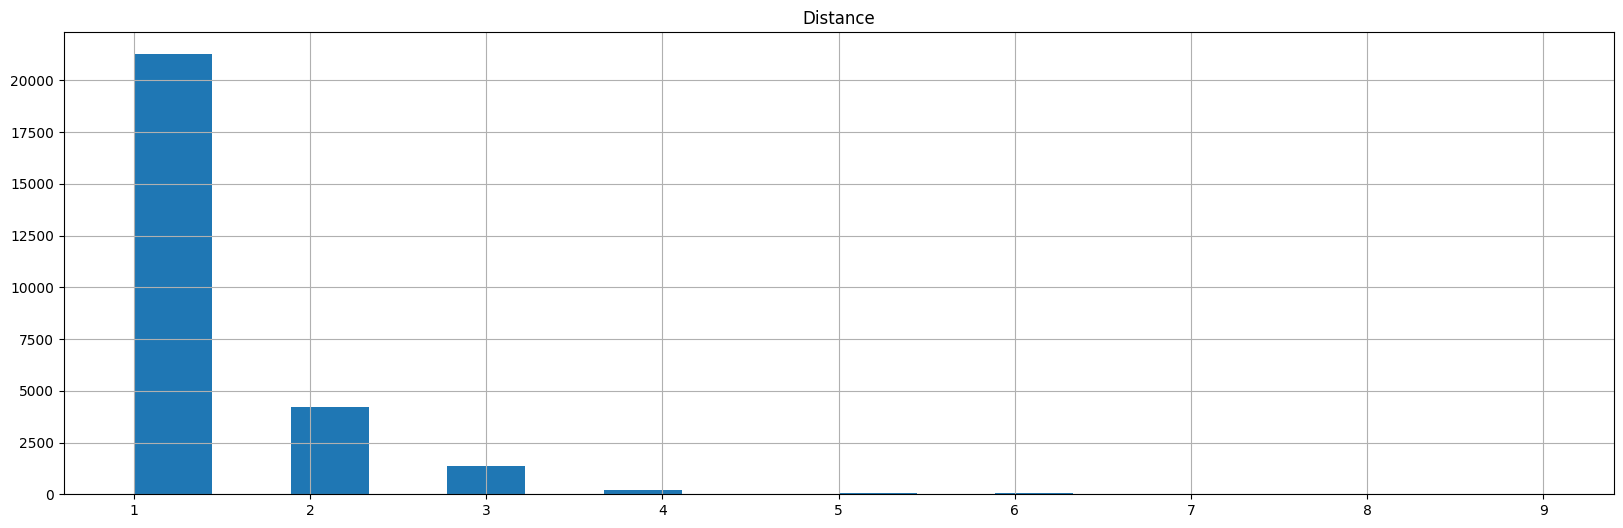

In [502]:
import matplotlib.pyplot as plt

swaps_merge.hist(column='Distance', bins=18, figsize=(20,6))

# Make Routes

In [503]:
# Initialize the dataframe for forming routes
swaps_tx_route = pd.DataFrame(columns = ['id', 'route', 'ultimate_source', 'ultimate_target', 'intermediary', 'pair', 'pair_str', 'volume_usd'])


In [504]:
# Sort tx for each parent transactions by linking tokens and trading volume
for p_tx_index in swaps_merge.index.get_level_values(0).unique():
    parent_tx = swaps_merge.loc[p_tx_index, :]

    # Select all the sub-transactions belong to one parent transaction and sort them
    # Sort Algo: pick element from unsorted list, insert it from head OR tail in the sorted list

    # initialize sorted and unsorted list
    unsorted_parent_tx = parent_tx.copy().reset_index()
    # initialize the sorted list by setting the first element as the first element unsorted list
    sorted_parent_tx = pd.DataFrame(unsorted_parent_tx.head(1), columns=unsorted_parent_tx.head(1).columns.values)
    # drop it from the unsorted list
    unsorted_parent_tx = unsorted_parent_tx.drop(labels=sorted_parent_tx.head(1).index, axis=0)

    sort_index=0

    iter = 0 # control the max loop limatation for the parent transactions which can not be sorted like the chain

    # Do loop until sort all the sub-txs:
    while len(sorted_parent_tx)!=len(parent_tx):
        iter+=1

        if iter>50: # control variable: assume no chain length over 50
            swaps_tx_route.loc[len(swaps_tx_route.index)] = [p_tx_index, 'Error', 'Error', 'Error', 'Error', 'Error', 'Error', 'Error']
            print("Error: Incorrect format at transaction: ", p_tx_index)
            break

        for index, row in unsorted_parent_tx.iterrows():
            # add from head
            if float(sorted_parent_tx.iloc[0]['Pool_Out_Volume']) + float(row['Pool_In_Volume']) == 0 and str(sorted_parent_tx.iloc[0]['Source']) == str(row['Target']):
                ## sort_index-=0
                sorted_parent_tx.loc[-1] = row
                unsorted_parent_tx.drop(labels=index, axis=0)
                sorted_parent_tx = sorted_parent_tx.sort_index().reset_index(drop=True)
                break
            
            # add from tail
            elif float(sorted_parent_tx.iloc[-1]['Pool_In_Volume']) + float(row['Pool_Out_Volume']) == 0 and str(sorted_parent_tx.iloc[0]['Target']) == str(row['Source']):
                sorted_parent_tx.loc[len(sorted_parent_tx)] = row
                unsorted_parent_tx.drop(labels=index, axis=0)
                sorted_parent_tx = sorted_parent_tx.sort_index().reset_index(drop=True)
                break
    # Complete sort the sub-transactions in dataframe 

    # Form the sorted sequence in list and get the average trading volume for the parent transaction
    sum_volume = 0
    route_list = []

    # add the source token in each sub-transaction to the route list in the parent transaction
    for index, row in sorted_parent_tx.iterrows():
        route_list.append(row['Source'])
        sum_volume += row['amountUSD']

    # add the last element
    route_list.append(sorted_parent_tx.iloc[-1]['Target'])

    # get the average trading volume usd in the trading chain
    avg_volume = sum_volume/len(parent_tx)

    # Theoritically, the algo complexity is (N-1)!, but in most cases it is N-1
    swaps_tx_route.loc[len(swaps_tx_route.index)] = [p_tx_index, route_list, route_list[0], route_list[-1], route_list[1:-1], [route_list[0], route_list[-1]], str([route_list[0], route_list[-1]]), avg_volume]



Error: Incorrect format at transaction:  0x8c28cad38d746cb6c452257435c10f5c49af796b0fe1bd276bc9fa3d871ac3c1
Error: Incorrect format at transaction:  0x552fb53b65254b895b579c77e7ae072653373c85d82ad2fbb37fbfe7d018363c
Error: Incorrect format at transaction:  0x457f27f424a8224681a2e4a79b5f158c269538689c4b2243cd8586a3cf596422
Error: Incorrect format at transaction:  0x6155c9085eb291921bce33ed888b707a7b42765d6ab6fa5f5633245319e13347
Error: Incorrect format at transaction:  0x115338bc65f46d3be9df933c59a60c098b49f18f25f308b1f23bac7e2299d674
Error: Incorrect format at transaction:  0xa4aa1d281969f74a8f54848c7193391cec0fe668ff8f71feb0fbb860e7c35f8b
Error: Incorrect format at transaction:  0x4456bbcd94c1e60e8bcdc17bd296e2ef9915097d5cf25352ff134b7f639c5a72
Error: Incorrect format at transaction:  0x403324b0790eba6354b729722ea653d4ed3696ac86e3eb063714483d3f1f5231
Error: Incorrect format at transaction:  0x3e6bd198dacb066273c5413fdd794f5d9c6ecf99d808db50336ab60eb3b3f9a4
Error: Incorrect format at t

In [505]:
swaps_tx_route

,id,route,ultimate_source,ultimate_target,intermediary,pair,pair_str,volume_usd
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,"[WETH, ELON]",WETH,ELON,[],"[WETH, ELON]","['WETH', 'ELON']",9823.486251
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,"[WETH, ELON]",WETH,ELON,[],"[WETH, ELON]","['WETH', 'ELON']",5847.604834
2,0x60f9fea1939df19789bf1128830eefbb2388b1953744...,"[USDT, WETH, ELON]",USDT,ELON,[WETH],"[USDT, ELON]","['USDT', 'ELON']",4975.519693
3,0xa39a21288a8b72232e1f46769c2ce846f95077b215c9...,"[USDT, WETH, ELON]",USDT,ELON,[WETH],"[USDT, ELON]","['USDT', 'ELON']",2983.64657
4,0xbb7c51adf1fdf8b1d038a4020299cd654477ba7e47f4...,"[WETH, USDC, TSUKA]",WETH,TSUKA,[USDC],"[WETH, TSUKA]","['WETH', 'TSUKA']",42.639627
...,...,...,...,...,...,...,...,...
24660,0x2fe885dc1c4ccaae75745b00b8101ed57b9dd1eba753...,"[WETH, APE]",WETH,APE,[],"[WETH, APE]","['WETH', 'APE']",9472.030242
24661,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,Error,Error,Error,Error,Error,Error,Error
24662,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,"[WETH, DAI, FUN]",WETH,FUN,[DAI],"[WETH, FUN]","['WETH', 'FUN']",3155.465947
24663,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,"[WETH, APE]",WETH,APE,[],"[WETH, APE]","['WETH', 'APE']",5423.674193


# Make Labels

In [506]:
swaps_tx_route['label'] = 0
swaps_tx_route['new_list'] = 0


for index, tx in swaps_tx_route.iterrows():
    # Label the loop transactions (contain loop) like: [A, B, C, A] "LOOP", [A, B, C, A, D] "SPOON"
    # Note: "Spoon" is a special case belonging to "LOOP", so label "LOOP" first then change it to "SPOON"
    if len(tx['route'])-len(list(set(tx['route'])))!=0 and tx['route'] != 'Error': # duplicate element exists
        swaps_tx_route.loc[index, 'label'] = 'loop'

        # Identity the "SPOON"
        duplicate_counter = dict(Counter(tx['route']))
        duplicate_element = {key:value for key, value in duplicate_counter.items() if value > 1}

        new_list = [] # reformat from [A, B, C, A, D] to [[A, B, C, A], D]
        remaining = tx['route'] # store the remaining except the "LOOP" part in "SPOON"

        for loop_node, element_count in duplicate_element.items():
            while element_count!=0 and len(remaining)!=0:
                if loop_node in remaining[remaining.index(loop_node)+1:]:
                    loop_start_index = remaining.index(loop_node)
                    if loop_start_index > 0:
                        new_list.append(remaining[:loop_start_index])
                        remaining = remaining[loop_start_index:]

                    loop_end_index = remaining[1:].index(loop_node) + 1
                    new_list.append(remaining[:loop_end_index+1])
                    remaining = remaining[loop_end_index+1:]

                    if len(remaining)!=0:
                        new_list.append(remaining)

                element_count-=2
                
        # If the the remaining part exists beyond "LOOP", label it as "SPOON"
        if len(new_list) > 1:
            swaps_tx_route.loc[index, 'label'] = 'spoon'

        swaps_tx_route.loc[index, 'new_list'] = str(new_list)

    # Label the unformated as "Error"
    elif tx['route'] == 'Error':
        swaps_tx_route.loc[index, 'label'] = 'Error'
                
swaps_tx_route



,id,route,ultimate_source,ultimate_target,intermediary,pair,pair_str,volume_usd,label,new_list
0,0x2eb690fa93ae8a38f7d05a4dec09908817ba438f87eb...,"[WETH, ELON]",WETH,ELON,[],"[WETH, ELON]","['WETH', 'ELON']",9823.486251,0,0
1,0x5a1d8bcd6da8b057e92024cfa8a08a9eef810e7ed7dd...,"[WETH, ELON]",WETH,ELON,[],"[WETH, ELON]","['WETH', 'ELON']",5847.604834,0,0
2,0x60f9fea1939df19789bf1128830eefbb2388b1953744...,"[USDT, WETH, ELON]",USDT,ELON,[WETH],"[USDT, ELON]","['USDT', 'ELON']",4975.519693,0,0
3,0xa39a21288a8b72232e1f46769c2ce846f95077b215c9...,"[USDT, WETH, ELON]",USDT,ELON,[WETH],"[USDT, ELON]","['USDT', 'ELON']",2983.64657,0,0
4,0xbb7c51adf1fdf8b1d038a4020299cd654477ba7e47f4...,"[WETH, USDC, TSUKA]",WETH,TSUKA,[USDC],"[WETH, TSUKA]","['WETH', 'TSUKA']",42.639627,0,0
...,...,...,...,...,...,...,...,...,...,...
24660,0x2fe885dc1c4ccaae75745b00b8101ed57b9dd1eba753...,"[WETH, APE]",WETH,APE,[],"[WETH, APE]","['WETH', 'APE']",9472.030242,0,0
24661,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,Error,Error,Error,Error,Error,Error,Error,Error,0
24662,0x404399f8c95b3ae6fb3f69b12582c06a00d2ace8a52b...,"[WETH, DAI, FUN]",WETH,FUN,[DAI],"[WETH, FUN]","['WETH', 'FUN']",3155.465947,0,0
24663,0xcb381f474e6e0a33568705cf27f00ac2d8ee32778d5a...,"[WETH, APE]",WETH,APE,[],"[WETH, APE]","['WETH', 'APE']",5423.674193,0,0


# Compute Centrality (Count Based)

In [507]:
# Exclude "LOOP" AND "SPOON"
count_based_set = swaps_tx_route[swaps_tx_route['label'] == 0]
# Get all involving tokens as nodes
node_set_count = count_based_set['ultimate_source'].append(count_based_set['ultimate_target']).unique()

/var/folders/b6/48dzsft50nbf8yc6ms2vw0900000gn/T/ipykernel_3253/3561743451.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_set_count = count_based_set['ultimate_source'].append(count_based_set['ultimate_target']).unique()


In [508]:
# Dataframe for the sigma of count based set
sigma_count_value = count_based_set['pair'].value_counts()
sigma_count = pd.DataFrame({'pair': sigma_count_value.index, 'sigma_count': sigma_count_value.values})

sigma_count['pair_index'] = sigma_count['pair'].apply(lambda x: str(x)) # use str-format as index (list-format can not be indexed)
sigma_count = sigma_count.set_index('pair_index')
sigma_count

,pair,sigma_count
pair_index,,
"['USDC', 'WETH']","[USDC, WETH]",3732
"['WETH', 'USDC']","[WETH, USDC]",3720
"['USDT', 'WETH']","[USDT, WETH]",1465
"['WETH', 'USDT']","[WETH, USDT]",1436
"['WETH', 'DAI']","[WETH, DAI]",1089
...,...,...
"['agEUR', 'CRV']","[agEUR, CRV]",1
"['SHIB', 'SAITAMA']","[SHIB, SAITAMA]",1
"['UNI', 'Metis']","[UNI, Metis]",1


In [509]:
# Dataframe for the conditional sigma of count based set
sigma_con_count = pd.DataFrame(columns = ['pair_index', 'node', 'sigma_conditional_count'])
sigma_con_count = sigma_con_count.set_index(['pair_index', 'node'])

# Initialize
for index, row in sigma_count.iterrows():
    for node in node_set_count:
        sigma_con_count.loc[(str(row['pair']), node), 'sigma_conditional_count'] = 0

# Compute
for index, row in count_based_set.iterrows():
    if len(row['intermediary'])>0:
        for inter_node in row['intermediary']:
            sigma_con_count.loc[(str(row['pair']), inter_node), 'sigma_conditional_count'] += 1

sigma_con_count

sigma_conditional_count
pair_index       node                          
['USDC', 'WETH'] WETH                         0
                 USDT                        25
                 USDC                         0
                 WOO                          0
                 SAND                         0
...                                         ...
['SHIB', 'USDT'] AAVE                         0
                 BTT                          0
                 renBTC                       0
                 USDD                         0
                 MSI                          0

[25704 rows x 1 columns]

In [510]:
# Dataframe for the scores of betweenness centrality (by nodes) of count based set
# Initialize
betweenness_score_count = pd.DataFrame({'node': node_set_count, 'betweenness_centrality_count': 0})
betweenness_score_count = betweenness_score_count.set_index('node')

# Compute for node n
for node in node_set_count:
    sigma_sum = 0
    sigma_con_sum = 0

    # for each pair<s,t>
    for pair_index, row in sigma_count.iterrows():
        sigma_st = sigma_count.loc[str(pair_index), 'sigma_count']
        sigma_con_stn = sigma_con_count.loc[(str(pair_index), str(node)), 'sigma_conditional_count']

        sigma_sum += sigma_st
        sigma_con_sum += sigma_con_stn

    betweenness_score_n_count = sigma_con_sum/sigma_sum
    # store the value
    betweenness_score_count.loc[str(node), 'betweenness_centrality_count'] = betweenness_score_n_count

betweenness_score_count

,betweenness_centrality_count
node,
WETH,0.031332
USDT,0.003327
USDC,0.038406
WOO,0.000000
SAND,0.000000
...,...
AAVE,0.000000
BTT,0.000000
renBTC,0.000000


# Compute Centrality (Volume Weighted)

In [511]:
# Exclude "LOOP" AND "SPOON"
volume_based_set = swaps_tx_route[swaps_tx_route['label'] == 0]
# Get all involving tokens as nodes
node_set_volume = volume_based_set['ultimate_source'].append(volume_based_set['ultimate_target']).unique()

/var/folders/b6/48dzsft50nbf8yc6ms2vw0900000gn/T/ipykernel_3253/2386897659.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  node_set_volume = volume_based_set['ultimate_source'].append(volume_based_set['ultimate_target']).unique()


In [512]:
# Dataframe for the sigma of count based set
sigma_volume = volume_based_set[['pair_str', 'volume_usd']].groupby('pair_str').agg('sum')
sigma_volume.index = sigma_volume.index.set_names(['pair_index'])
sigma_volume.rename(columns={'volume_usd': 'sigma_volume'}, inplace = True)
sigma_volume

,sigma_volume
pair_index,
"['$JOY', 'WETH']",488021.906394
"['AAVE', 'LDO']",223.914754
"['AAVE', 'USDC']",2863.971307
"['AAVE', 'WETH']",22981.930073
"['ALPHA', 'USDC']",2418.117353
...,...
"['renBTC', 'WETH']",12096.330170
"['stETH', 'PAXG']",6155.325037
"['stETH', 'USDC']",16275.933590


In [513]:
# Dataframe for the conditional sigma of count based set
sigma_con_volume = pd.DataFrame(columns = ['pair_index', 'node', 'sigma_conditional_volume'])
sigma_con_volume = sigma_con_volume.set_index(['pair_index', 'node'])

# Initialize
for index, row in sigma_volume.iterrows():
    for node in node_set_volume:
        sigma_con_volume.loc[(str(index), node),:] = (0)

# Compute
for index, row in volume_based_set.iterrows():
    if len(row['intermediary'])>0:
        for inter_node in row['intermediary']:
            sigma_con_volume.loc[(str(row['pair']), inter_node), 'sigma_conditional_volume'] += row['volume_usd']

sigma_con_volume

sigma_conditional_volume
pair_index        node                           
['$JOY', 'WETH']  WETH                          0
                  USDT                          0
                  USDC                          0
                  WOO                           0
                  SAND                          0
...                                           ...
['stETH', 'WETH'] AAVE                          0
                  BTT                           0
                  renBTC                        0
                  USDD                          0
                  MSI                           0

[25704 rows x 1 columns]

In [514]:
# Dataframe for the scores of betweenness centrality (by nodes) of count based set

# Initialize
betweenness_score_volume = pd.DataFrame({'node': node_set_volume, 'betweenness_centrality_volume': 0})
betweenness_score_volume = betweenness_score_volume.set_index('node')

# Compute for node n
for node in node_set_volume:
    sigma_sum = 0
    sigma_con_sum = 0
    
    # for each pair<s,t>
    for pair_index, row in sigma_volume.iterrows():
        sigma_st = sigma_volume.loc[str(pair_index), 'sigma_volume']
        sigma_con_stn = sigma_con_volume.loc[(str(pair_index), str(node)), 'sigma_conditional_volume']
        
        sigma_sum += sigma_st
        sigma_con_sum += sigma_con_stn

    betweenness_score_n_volume = sigma_con_sum/sigma_sum
    # store the value
    betweenness_score_volume.loc[str(node), 'betweenness_centrality_volume'] = betweenness_score_n_volume

betweenness_score_volume

,betweenness_centrality_volume
node,
WETH,0.006200
USDT,0.000597
USDC,0.014941
WOO,0.000000
SAND,0.000000
...,...
AAVE,0.000000
BTT,0.000000
renBTC,0.000000


# Compare Results of Count-Based and Volume-Based

In [515]:
compare_table = betweenness_score_count.sort_values(by='betweenness_centrality_count', ascending=False).join(betweenness_score_volume)
compare_table.head(20)

,betweenness_centrality_count,betweenness_centrality_volume
node,,
USDC,0.038406,0.014941
WETH,0.031332,0.006200
WBTC,0.003453,0.005699
USDT,0.003327,0.000597
DAI,0.003285,0.000900
FUN,0.000969,0.000158
agEUR,0.000926,0.000202
HEX,0.000379,0.000018
UNI,0.000084,0.000011


This is a presentation version for illustrating the code structure, scripts for running is betweenness_scripts.py